Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
(?, 7, 7, 64)
0.10678026
0.025884915
0.067663506
0.0071102595
0.02274875
정확도 : 0.9878000020980835


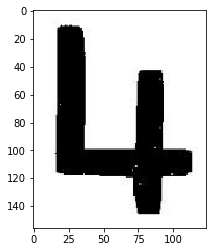

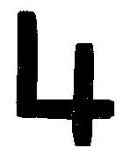

<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'numpy.ndarray'>


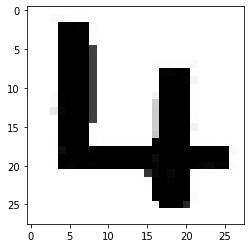

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.01568627 0.01568627 0.01176471 0.00392157 0.00784314
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.00392157
  1.         1.         0.99215686 1.         0.01960784 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         1.
  1.         1.         0.01176471 0.         0.         0.
  0.         0.         

In [2]:
## Mini Team Project

import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
# import PIL.Image as pilimg
from PIL import Image
from skimage import io,color

## 1 . Data Loading
## 데이터가 얼마나 잘 정형화 되어 있나 이게 진짜 중요

mnist = input_data.read_data_sets("./data/mnist" , one_hot=True)
## 2. Model 정의 (Tensorflow  gragh 생성)
tf.reset_default_graph() # 그래프 초기화

## 2.1 placeholder
X = tf.placeholder(shape = [None , 784] , dtype = tf.float32)
Y = tf.placeholder(shape = [None , 10] , dtype = tf.float32)
drop_rate = tf.placeholder(dtype = tf.float32) ## 스칼라니깐 데이터 타입 없이 그냥 데이터 타입만
## 3 Convolution
## CNN은 이미지 학습에 최적화 되어 있는 deep Learning방법
## 입력받은 이미지의 형태가 4차원 배열
## 이미지의 갯수 이미지의 width 이미지의 height  color의 수
X_img = tf.reshape(X , [-1 ,28,28,1])

## 3.1 Convolution Layer1
## filter 정의 -> filter의 shape(width,height,color,#filter)
L1 = tf.layers.conv2d(inputs=X_img,filters= 32, strides=1,kernel_size=[3,3],padding = "SAME",activation=tf.nn.relu)

L1 = tf.layers.max_pooling2d(inputs = L1 , pool_size= [2,2] , padding = "SAME" , strides= 2)
## pool_size == ksize

## Convolution Layer2

L2 = tf.layers.conv2d(inputs=L1,filters= 64, strides=1,kernel_size=[3,3],padding = "SAME",activation=tf.nn.relu)

L2 = tf.layers.max_pooling2d(inputs = L2 , pool_size= [2,2] , padding = "SAME" , strides= 2)

print(L2.shape) ## (?, 7, 7, 64)

## 4. Neural Network

##convolution 결과(4차원)를 입력(2차원)으로 사용하기 위해 shape을 변경
L2 =  tf.reshape(L2,[-1,7*7*64])

# Layer 1

W1 = tf.get_variable("weight1" , shape = [7*7*64,128] , initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([128], name = "bias1"))

_layer1 = tf.nn.relu(tf.matmul(L2,W1)+b1)
layer1 = tf.layers.dropout(_layer1,rate=drop_rate)

# Layer 2

W2 = tf.get_variable("weight2" , shape = [128,10] , initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([10], name = "bias2"))

_layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)
layer2 = tf.layers.dropout(_layer2,rate=drop_rate)

## 
logits = tf.matmul(layer1,W2) + b2
H = tf.nn.relu(logits)

## Cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits =logits , labels = Y))

## train
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

## Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

## model 저장
# global_step = tf.Variable(0, trainable=True, name="global_step")
saver = tf.train.Saver()



## 학습 진행 ( batch 처리 )
training_epoch = 5
batch_size = 100

for step in range(training_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    cost_val = 0
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _,cost_val = sess.run([train,cost], feed_dict = {X:batch_x,Y:batch_y,drop_rate:0.7})
    if step % 1 ==0:
        print(cost_val)
        
saver.save(sess, './tf_model/tf_model.ckpt', global_step=1000)

# Accuracy 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

result = sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels,drop_rate:1})
print("정확도 : {}".format(result))


## 이미지 예측
# Image Loading
# img = io.imread("./data/img/1.png", as_gray=True)
img = Image.open("./data/img/44.png")

plt.imshow(img, cmap= plt.get_cmap("gray"))
plt.show()
display(img)

print(type(img))

img_test = img.resize((28,28))

img = np.array(img_test)
print(type(img))


plt.imshow(img_test, cmap= plt.get_cmap("gray"))
plt.show()
display(img_test)

img_test = color.rgb2gray(img)

img_test = img_test.astype(np.float32)

img_test = 1-img_test

img_test = img_test.reshape(-1,784) # -1 : don`t care
print(img_test)
print(img_test.shape)
print(type(img_test))

## 이미지 숫자 예측
predict = tf.argmax(H,1)

result = sess.run(predict, feed_dict={X:img_test , drop_rate:1.0})
result2 = sess.run(H, feed_dict={X:img_test , drop_rate:1.0})
print("숫자 예측 결과 : {}".format(result))
print(result2)